In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-3c76cac5-2d7e-ec4a-b324-4e024898a275)


In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import tensorflow_datasets as tfds
# using tensorflow datasets we can directly get dataset in form of tensors
datasets=tfds.list_builders()
datasets

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [5]:
(train_data,test_data),ds_info=tfds.load(name="food101",
                                      split=["train","validation"],
                                       shuffle_files=True,
                                       as_supervised=True, # data gets returned in tuple format (data,label)
                                       with_info=True) # for info to be stored in ds_info


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteCFXW0R/food101-train.tfrecord*...:   0%|          …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteCFXW0R/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [6]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [7]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_path='/root/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo n

In [8]:
class_names=ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [9]:
# checking whether labels are one hot encoded or label encoded
train_sample=train_data.take(1)
train_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
for image, label in train_sample:
  print(f"target class: {label}\n class name: {class_names[label]}")
# labels are label encoded so we need to use sparse categoricalcrossentropy as loss function

target class: 64
 class name: miso_soup


In [11]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 43,  89, 125],
        [ 52,  96, 131],
        [ 85, 128, 162],
        ...,
        [251, 254, 223],
        [250, 253, 222],
        [250, 253, 222]],

       [[ 42,  88, 124],
        [ 53,  97, 132],
        [ 92, 135, 169],
        ...,
        [251, 254, 223],
        [250, 253, 222],
        [250, 253, 222]],

       [[ 45,  89, 124],
        [ 52,  96, 131],
        [ 92, 135, 169],
        ...,
        [251, 254, 223],
        [250, 253, 222],
        [250, 253, 222]],

       ...,

       [[ 91,  99,  86],
        [ 89,  97,  84],
        [ 88,  94,  82],
        ...,
        [ 37,  44,  50],
        [ 34,  41,  47],
        [ 31,  38,  44]],

       [[ 91,  99,  86],
        [ 90,  98,  85],
        [ 88,  96,  83],
        ...,
        [ 38,  43,  47],
        [ 35,  40,  44],
        [ 33,  38,  42]],

       [[ 93, 101,  88],
        [ 93, 101,  88],
        [ 89,  97,  84],
        ...,
        [ 37,  42,  4

In [12]:
import tensorflow as tf
tf.reduce_max(image),tf.reduce_min(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

(-0.5, 511.5, 511.5, -0.5)

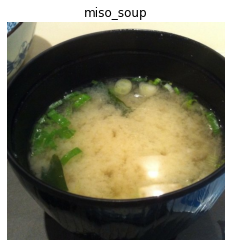

In [13]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label])
plt.axis("off")

Now we need to preprocess our data:
* we have uint8 datatype so this needs to be converted into float32 or float16.
* resize the image.
** as we need every image to be of same size in a batch.
* rescale our image between 0 & 255.

In [14]:
def preprocess_img(image, label):
  image=tf.image.resize(image,[224,224])
  return tf.cast(image,tf.float32), label

In [15]:
preprocessed_img=preprocess_img(image,label)[0]
print(label)
print(f"Image before preprocessing:\n {image},\n Shape: {image.shape},\n DataType: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img},\n Shape: {preprocessed_img.shape},\n Datatype: {preprocessed_img.dtype}")

tf.Tensor(64, shape=(), dtype=int64)
Image before preprocessing:
 [[[ 43  89 125]
  [ 52  96 131]
  [ 85 128 162]
  ...
  [251 254 223]
  [250 253 222]
  [250 253 222]]

 [[ 42  88 124]
  [ 53  97 132]
  [ 92 135 169]
  ...
  [251 254 223]
  [250 253 222]
  [250 253 222]]

 [[ 45  89 124]
  [ 52  96 131]
  [ 92 135 169]
  ...
  [251 254 223]
  [250 253 222]
  [250 253 222]]

 ...

 [[ 91  99  86]
  [ 89  97  84]
  [ 88  94  82]
  ...
  [ 37  44  50]
  [ 34  41  47]
  [ 31  38  44]]

 [[ 91  99  86]
  [ 90  98  85]
  [ 88  96  83]
  ...
  [ 38  43  47]
  [ 35  40  44]
  [ 33  38  42]]

 [[ 93 101  88]
  [ 93 101  88]
  [ 89  97  84]
  ...
  [ 37  42  46]
  [ 35  40  44]
  [ 35  40  44]]],
 Shape: (512, 512, 3),
 DataType: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 48.969387  93.68367  129.04082 ]
  [124.78572  164.07144  195.28572 ]
  [125.37245  158.94388  183.5153  ]
  ...
  [251.78574  254.78574  223.78574 ]
  [251.       254.       223.      ]
  [250.       253.       222.   

In [16]:
train_data=train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
# autotune allows us to use all the compute power or CPU's provided in colab without this it would by default utilize just one CPU chip
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
# we shuffled our data already while downloading it but doing it again so that it does not learn any particular orer to be safe
# if we set buffer size in shuffle to be length of train data, it will shuffle them all at once. In our case it will shuffle 1000 samples at once.
test_data=test_data.map(preprocess_img,num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)
# autotune in prefetch will use all CPU available to preprocess our data whilst previous one is being computed on GPU.

* The first part of the function does a shuffle. The goal of this one is to take the next X images, where X is the buffer size, and mix them every time we pass over the dataset, This ensures that the data is shuffled differently at every epoch of the training, but since the buffer size has to be small for performance sake, it does not replace the original shuffling of the full dataset. The data is then separated in batches and then repeated forever. The last step is to prefetch some data, which preloads the data to be used in the future, to help with performance.
* It is important to understand that even if one element is taken from the dataset, there are 32 images loaded because an element in this case corresponds to a batch.
* **padded_shapes**:  A (nested) structure of tf.TensorShape or tf.int64 vector tensor-like objects representing the shape to which the respective component of each input element should be padded prior to batching. Any unknown dimensions will be padded to the maximum size of that dimension in each batch. If unset, all dimensions of all components are padded to the maximum size in the batch. padded_shapes must be set if any component has an unknown rank.
* **drop_remainder**: A tf.bool scalar tf.Tensor, representing whether the last batch should be dropped in the case it has fewer than batch_size elements; the default behavior is not to drop the smaller batch.
* Most dataset input pipelines should end with a call to ***prefetch***. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.
* **cache**: when you cache a dataset, the transformations before the cache one (like the file opening and data reading) are executed only during the first epoch. The next epochs will reuse the data cached by thecache transformation. But this will work only if our RAM can store that much data.

In [17]:
train_data,test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [40]:
#  callbacks
import tensorflow as tf
import datetime
def tensorboard_callback(dir_name,filename):
  log_dir=dir_name+"/"+filename+datetime.datetime.now().strftime("%d/%m/%Y-%H/%M/%S")
  tensorboard=tf.keras.callbacks.TensorBoard(log_dir)
  print(f"Saving tensorboard log files to {log_dir}.")
  return tensorboard

checkpoint_path="101_class_100%checkpoint"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                    save_weights_only=True,
                                                    verbose=0,
                                                    save_best_only=False,
                                                    monitor="val_acc")


In [41]:
#  mixed precision: It utilizes combination of float16 and float32 data types to speed up model performance.
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [42]:
mixed_precision.global_policy()

<Policy "mixed_float16">

 # Mixed Precision: 
 * It utilizes combination of float16 and float32 data types to speed up model performance.
 * Computation or model finding patterns is done using float16 but variable storage is done using float32 datatype.
 * Output layer i.e. dense layer has to be used with dtype float32 as float16 is not numericaly stable datatype.
 * Adding a float16 softmax in the middle of a model is fine, but a softmax at the end of the model should be in float32. The reason is that if the intermediate tensor flowing from the softmax to the loss is float16 or bfloat16, numeric issues may occur.

In [43]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_aug=Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
])

In [44]:
# feature extraction model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

base_model=tf.keras.applications.EfficientNetB0(include_top=False)
# base_model.layers[0].dtype_policy=tf.float32
base_model.trainable=False
inputs=layers.Input(shape=(224,224,3),name="input")
x=data_aug(inputs)
# if not using efficientnet like model then we need to rescale our data
#  x=preprocessing.Rescaling(1/255)(x)
x=base_model(inputs,training=False) # makes sure layers that need to be in inference mode stay like that only
x=layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x=layers.Dense(len(class_names))(x)
outputs=layers.Activation("softmax", dtype=tf.float32, name="softmax_layer")(x)
model=tf.keras.Model(inputs,outputs)

# compile
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [45]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_layer (Activation)  (None, 101)               0         
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
___________________________________________

In [46]:
# checking whether our layers are using mixed precision or not
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)
  # it changes computing datatype for those layers which can run on float16 also to increase tensor storage capacity on GPU and the rest runs on float32. We can also hardcode some layers to run on a particular datatype like we did for output layer or activation layer.

input True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
softmax_layer True float32 <Policy "float32">


In [47]:
for layer in model.layers[1].layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_2 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
rescaling_3 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float

In [48]:
history101=model.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=int(0.15*len(test_data)),
                     callbacks=[tensorboard_callback("food_vision_log","efficientnetb0"),
                                model_checkpoint])

Saving tensorboard log files to food_vision_log/efficientnetb011/03/2023-10/04/10.


Epoch 1/5
2368/2368 [==============================] - 204s 81ms/step - loss: 1.7170 - accuracy: 0.5825 - val_loss: 1.1414 - val_accuracy: 0.6973
Epoch 2/5
2368/2368 [==============================] - 195s 81ms/step - loss: 1.1999 - accuracy: 0.6893 - val_loss: 1.0374 - val_accuracy: 0.7180
Epoch 3/5
2368/2368 [==============================] - 191s 80ms/step - loss: 1.0540 - accuracy: 0.7240 - val_loss: 0.9967 - val_accuracy: 0.7280
Epoch 4/5
2368/2368 [==============================] - 184s 77ms/step - loss: 0.9597 - accuracy: 0.7472 - val_loss: 0.9814 - val_accuracy: 0.7296
Epoch 5/5
2368/2368 [==============================] - 185s 77ms/step - loss: 0.8894 - accuracy: 0.7656 - val_loss: 0.9635 - val_accuracy: 0.7376


In [49]:
result=model.evaluate(test_data)

790/790 [==============================] - 54s 68ms/step - loss: 0.9743 - accuracy: 0.7332


In [50]:
import matplotlib.pyplot as plt

def plot_loss(history):
  accuracy=history.history["accuracy"]
  epoch=range(len(history.history["loss"]))
  plt.plot(epoch,accuracy,label="training_accuracy")
  plt.plot(epoch,history.history["val_accuracy"],label="validation accuracy")
  plt.xlabel("epochs")
  plt.title("accuracy")
  plt.legend()

  plt.figure()
  plt.plot(epoch,history.history["loss"],label="training loss")
  plt.plot(epoch,history.history["val_loss"],label="validation loss")
  plt.xlabel("epochs")
  plt.title("loss")
  plt.legend()

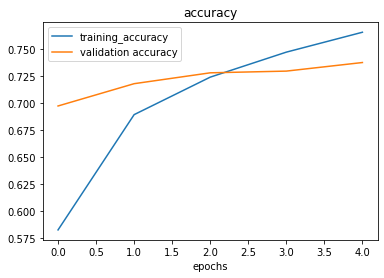

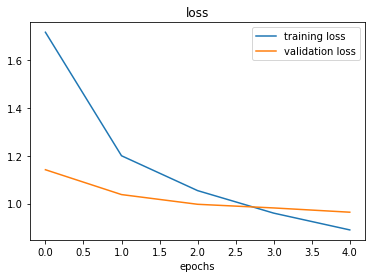

In [51]:
plot_loss(history101)

In [52]:
acc=history101.history["accuracy"]

In [53]:
acc

[0.582481861114502,
 0.6892805099487305,
 0.7240132093429565,
 0.7471815347671509,
 0.7656105756759644]

In [54]:
base_model.trainable=True
for layer in base_model.layers[:-5]:
  layer.trainable=False

In [55]:
for i,layer in enumerate(base_model.layers):
  print(i,layer,layer.trainable, layer.dtype_policy)

0 <keras.engine.input_layer.InputLayer object at 0x7f19c85d94f0> False <Policy "float32">
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f19c4132e20> False <Policy "mixed_float16">
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7f19c72e4730> False <Policy "mixed_float16">
3 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f19c40a6820> False <Policy "mixed_float16">
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f19aee44250> False <Policy "mixed_float16">
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f19c867b430> False <Policy "mixed_float16">
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f19aee9cdc0> False <Policy "mixed_float16">
7 <keras.layers.core.activation.Activation object at 0x7f19c4347fa0> False <Policy "mixed_float16">
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f19aee975e0> False <Policy "mixed_float16">
9 

In [56]:
model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam(0.0001))

tuned_history101=model.fit(train_data,
                           epochs=10,
                           validation_data=test_data,
                           steps_per_epoch=len(train_data),
                           validation_steps=int(0.25*len(test_data)),
                           initial_epoch=history101.epoch[-1])

Epoch 5/10
2368/2368 [==============================] - 210s 84ms/step - loss: 0.7664 - accuracy: 0.7956 - val_loss: 0.9219 - val_accuracy: 0.7451
Epoch 6/10
2368/2368 [==============================] - 199s 83ms/step - loss: 0.6478 - accuracy: 0.8289 - val_loss: 0.9100 - val_accuracy: 0.7490
Epoch 7/10
2368/2368 [==============================] - 193s 80ms/step - loss: 0.5639 - accuracy: 0.8526 - val_loss: 0.9189 - val_accuracy: 0.7471
Epoch 8/10
2368/2368 [==============================] - 197s 83ms/step - loss: 0.4947 - accuracy: 0.8731 - val_loss: 0.9084 - val_accuracy: 0.7576
Epoch 9/10
2368/2368 [==============================] - 207s 86ms/step - loss: 0.4360 - accuracy: 0.8890 - val_loss: 0.9156 - val_accuracy: 0.7544
Epoch 10/10
2368/2368 [==============================] - 198s 83ms/step - loss: 0.3832 - accuracy: 0.9057 - val_loss: 0.9368 - val_accuracy: 0.7500


In [57]:
tuned_result=model.evaluate(test_data)
tuned_result

790/790 [==============================] - 55s 70ms/step - loss: 0.9366 - accuracy: 0.7514


[0.9365844130516052, 0.7514059543609619]

In [58]:
def compare_history(original,new,initial_epoch=5):
  acc=original.history["accuracy"]
  loss=original.history["loss"]
  val_loss=original.history["val_loss"]
  val_acc=original.history["val_accuracy"]

  total_acc=acc+new.history["accuracy"]
  total_loss=loss+new.history["loss"]
  total_val_acc=val_acc+new.history["val_accuracy"]
  total_val_loss=val_loss+new.history["val_loss"]

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training Accuracy")
  plt.plot(total_val_acc,label="Validation Accuracy")
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label="Fine Tuning Starts")
  plt.legend()
  plt.title("Training and Validation Accuracy")

  plt.subplot(2,1,2)
  plt.plot(total_loss,label="Training Loss")
  plt.plot(total_val_loss,label="Validation_loss")
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label="Fine Tuning Starts")
  plt.legend()
  plt.title("Training and Validation Loss")


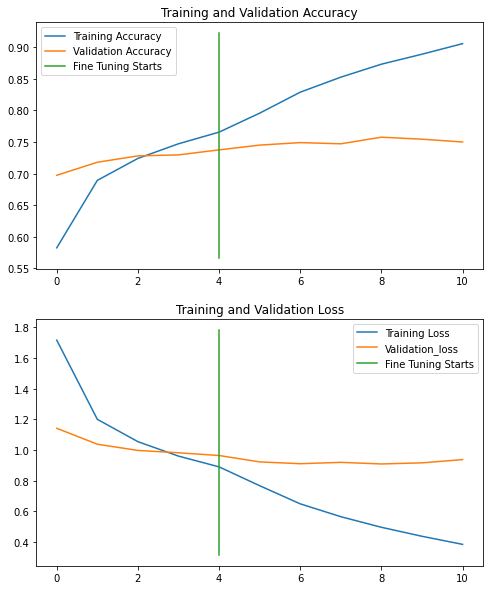

In [59]:
compare_history(history101,tuned_history101)
# we can clearly see that after fine tuning training accuracy is increasing at a good rate while validation accuracy decreases at quite a slow rate, this indiactes that our model is overfitted over the dataset

In [60]:
model.load_weights(checkpoint_path)

ValueError: ignored

In [ ]:
model.evaluate(test_data)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam())

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
lr_history101=model.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=int(0.25*len(test_data)),
                        initial_epoch=history101.epoch[-1],
                        callbacks=[lr_scheduler])

In [ ]:
lr=1e-4*10**(tf.range(5,10)/20)
plt.semilogx(lr,lr_history101.histtory["loss"])
plt.xlabel("learning rate")
plt.ylabel("log(loss)")